In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("Position_Salaries.csv")

In [47]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [48]:
df = df.drop(['Position'] , axis = 1)


In [49]:
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [50]:
len(df)

10

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [52]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [53]:
df.isnull().sum()

Level     0
Salary    0
dtype: int64

In [54]:
df.shape

(10, 2)

## Simple linear Regression

In [55]:
X = df.drop(['Salary'] , axis = 1)
y = df['Salary']

In [56]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [57]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [60]:
len(X_train) , len(y_train)

(6, 6)

In [61]:
len(X_test) , len(y_test)

(4, 4)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()

In [64]:
reg.fit(X_train , y_train)

LinearRegression()

In [65]:
reg.coef_

array([116507.17703349])

In [66]:
reg.intercept_

-426794.2583732056

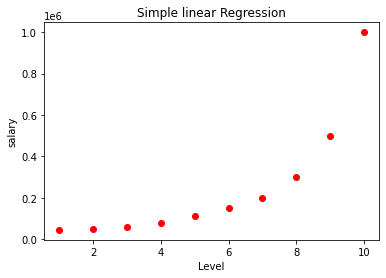

In [67]:
plt.title("Simple linear Regression")
plt.xlabel("Level")
plt.ylabel("salary")
plt.scatter(df['Level'] , df['Salary'] , color = 'red' , marker = 'o')
plt.show()

In [68]:
y_train_pred = reg.predict(X_train)

In [69]:
a = pd.DataFrame({"Actual" : y_train , 'Predicted' : y_train_pred})
a

,Actual,Predicted
7,300000,505263.157895
2,60000,-77272.727273
9,1000000,738277.511962
4,110000,155741.626794
3,80000,39234.449761
6,200000,388755.980861


In [70]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


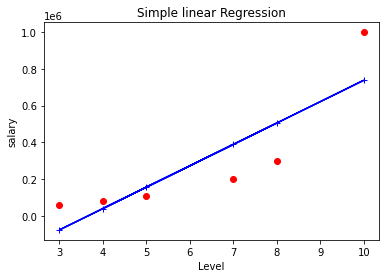

In [71]:
plt.title("Simple linear Regression")
plt.xlabel("Level")
plt.ylabel("salary")
plt.scatter(X_train , y_train , color = 'red' , marker = 'o')
plt.plot(X_train['Level'] , y_train_pred , color = 'blue' , marker = '+')
plt.show()

In [72]:
from sklearn.metrics import r2_score

In [73]:
r2_score(y_train , y_train_pred)

0.7368509287461497

In [74]:
b = reg.predict(X_test)

In [75]:
b

array([ 621770.33492823, -193779.90430622,  272248.80382775,
       -310287.08133971])

In [76]:
r2_score(y_test , b)

-0.5580551383902055

## Polinomial Linear Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly = PolynomialFeatures(degree = 2)

In [79]:
X_train

,Level
7,8
2,3
9,10
4,5
3,4
6,7


In [80]:
X_train = poly.fit_transform(X_train)

In [81]:
X_train

array([[  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [82]:
X_test = poly.fit_transform(X_test)

In [83]:
X_test

array([[ 1.,  9., 81.],
       [ 1.,  2.,  4.],
       [ 1.,  6., 36.],
       [ 1.,  1.,  1.]])

In [86]:
reg.fit(X_train , y_train)

LinearRegression()

In [88]:
y_train_pred_poly = reg.predict(X_train)

In [96]:
y_train_pred_poly

array([392000.        , 118363.63636364, 957939.3939394 ,  32181.81818182,
        42666.66666667, 206848.48484848])

In [89]:
c = pd.DataFrame({"Actual" : y_train , 'Predict' : y_train_pred_poly})

In [91]:
c

,Actual,Predict
7,300000,392000.000000
2,60000,118363.636364
9,1000000,957939.393939
4,110000,32181.818182
3,80000,42666.666667
6,200000,206848.484848


In [92]:
len(X_train) , len(y_train)

(6, 6)

In [93]:
X_train.shape

(6, 3)

In [94]:
y_train.shape

(6,)

ValueError: x and y must be the same size

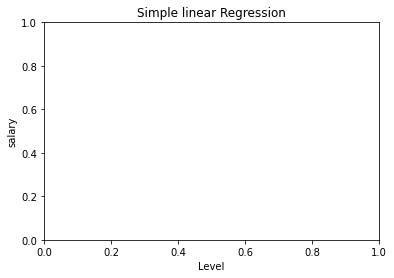

In [97]:
plt.title("Simple linear Regression")
plt.xlabel("Level")
plt.ylabel("salary")
plt.scatter(X_train , y_train , color = 'red' , marker = 'o')
plt.plot(X_train, y_train_pred_poly , color = 'blue' , marker = '+')
plt.show()

In [75]:
y_test_poly = reg.predict(X_test)

In [77]:
r2_score(y_train , y_train_pred_poly)

0.9670620125569348

In [78]:
r2_score(y_test , y_test_poly)

-0.770277133682878

## Overfitting problem 